In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = boston["data"]
y = boston["target"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=0)

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
step = 2

In [9]:
class MyBoosting:

    def __init__(self, num_estimators, loss='mse'):
        
        self.n = num_estimators
        self.loss=loss
        
    def fit(self, X, y):
        self.list_ensemble = []
        dtreg = DecisionTreeRegressor(max_depth = 2, criterion = self.loss)
        self.list_ensemble.append(dtreg.fit(X_tr, y_tr))
        for i in range(self.n):
            dtreg = DecisionTreeRegressor(max_depth = 2, criterion = self.loss)
            y_pred_gb = np.zeros_like(y_tr)
            for tree in self.list_ensemble:
                y_pred_gb += tree.predict(X_tr)
            y_pred_gb = y_pred_gb/step
            y_target_temp = y_tr - y_pred_gb
            self.list_ensemble.append(dtreg.fit(X_tr, y_target_temp))
            
    def predict(self, X):
        pred1_list = []
        for j in range(len(self.list_ensemble)):
            dtreg = self.list_ensemble[j]
            pred1 = dtreg.predict(X_te)
            pred1_list.append(pred1/step)
        return np.sum(pred1_list, axis=0)
        
        

In [10]:
myboost = MyBoosting(50, loss='mse')
myboost.fit(X_tr, y_tr)
mean_squared_error(y_te, myboost.predict(X_te))

21.782848743467532

In [11]:
accs1 = []
for i in range(1, 100):
    myboost1 = MyBoosting(num_estimators = i)
    myboost1.fit(X_tr, y_tr)
    n = myboost1.predict(X_te)
    mean_squared_error(y_te, n)
    accs1.append(mean_squared_error(y_te, n))

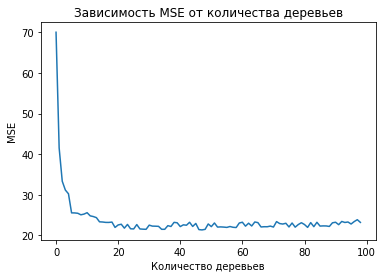

In [12]:
plt.plot(accs1)
plt.title(u"Зависимость MSE от количества деревьев")
plt.xlabel(u"Количество деревьев")
plt.ylabel(u"MSE")
plt.show()